## Polynomial Curve Fitting

### Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Functions

In [2]:
def error(y, y_pred):
    
    N = len(y)
    
    sse = np.sum(np.power(y_pred-y, 2))/2 # Sum-of-squares error
    
    rmse = np.sqrt(2*sse/N) # Root mean squere error
    
    return sse, rmse

In [3]:
class PolyFeatures():
    
    def __init__(self, M):

        self.M = M # Polynomial order

    def fit(self, X, y=None):

        return self

    def transform(self, X):

        N = len(X) # Number of examples

        X_poly = np.zeros([N, self.M+1], dtype=np.float64) # Initialize matrix

        # Fill matrix
        for i in range(N):
            for j in range(self.M+1):
                X_poly[i, j] = np.power(X[i], j)

        return X_poly

In [4]:
class CurveFitting():
    
    def __init__(self):
         pass

    def fit(self, X, y=None):
        
        # Normal equation: w = ((X'*X)^-1) *X'*y
        XT = X.T
        self.w = np.dot(np.dot(np.linalg.pinv(np.dot(XT, X)), XT), y)

        return self

    def predict(self, X):
        
        y_pred = np.dot(X, self.w) # Predicted values

        return y_pred

### Generate of synthetic data

#### Fixed

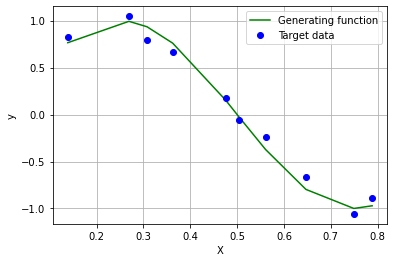

In [5]:
N = 10 # Number of examples

X = np.array([0.1387, 0.2691, 0.3077, 0.3625, 0.4756, 0.5039, 0.5607, 0.6468,0.7490, 0.7881])
X_val = np.array([0.07596669, 0.12331893, 0.18390779, 0.23991615, 0.23995253, 0.35095238, 0.40180803, 0.51324954, 0.62205513, 0.85303112])

y = np.array([0.8260, 1.0469, 0.7904, 0.6638, 0.1731, -0.0592, -0.2433, -0.6630, -1.0581, -0.8839])
y_val = np.array([0.52011295,  0.75369112,  0.77040848,  0.90138754,  1.01839809, 0.7707872 ,  0.70746727,  0.05088296, -0.75202252, -0.7100936])

y = y.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

func = np.sin(2*np.pi*X)

plt.plot(X, func, 'g')
plt.plot(X, y, 'bo')
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.legend(['Generating function', 'Target data'])

plt.show()

#### Random

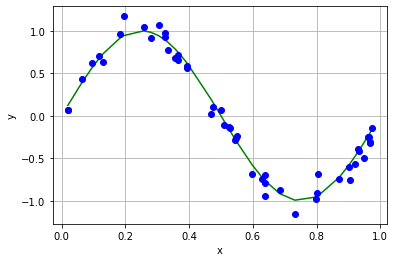

In [66]:
N = 50 # Number of examples

X = np.sort(np.random.rand(N)) # Training random examples
X_val = np.sort(np.random.rand(N)) # Validation random examples

noise = np.random.randn(N) # Gaussian noise

y = np.sin(2*np.pi*X) + 0.1*noise
y_val = np.sin(2*np.pi*X_val) + 0.1*noise

y = y.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

func = np.sin(2*np.pi*X)

plt.plot(X, func, 'g')
plt.plot(X, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

plt.show()

### Polynomial order analysis

In [6]:
M_list = [0, 1, 3, 9] # Polynomial degree

sse_array = np.zeros(len(M_list), dtype=np.float64)
rmse_array = np.zeros(len(M_list), dtype=np.float64)
sse_val_array = np.zeros(len(M_list), dtype=np.float64)
rmse_val_array = np.zeros(len(M_list), dtype=np.float64)

y_pred_list = []

i = 0
for M in M_list:
    
    # Training
    pf = PolyFeatures(M=M) # Polynomial features
    pf.fit(X)
    X_poly = pf.transform(X)

    cf = CurveFitting() # Curve fitting
    cf.fit(X_poly, y)

    y_pred = cf.predict(X_poly) # Predictions
    y_pred_list.append(y_pred)
    
    sse_array[i], rmse_array[i] = error(y, y_pred) # Errors

    # Validation    
    X_val_poly = pf.transform(X_val)
    y_val_pred = cf.predict(X_val_poly) # Predictions

    sse_val_array[i], rmse_val_array[i] = error(y_val, y_val_pred) # Errors
    
    i+=1

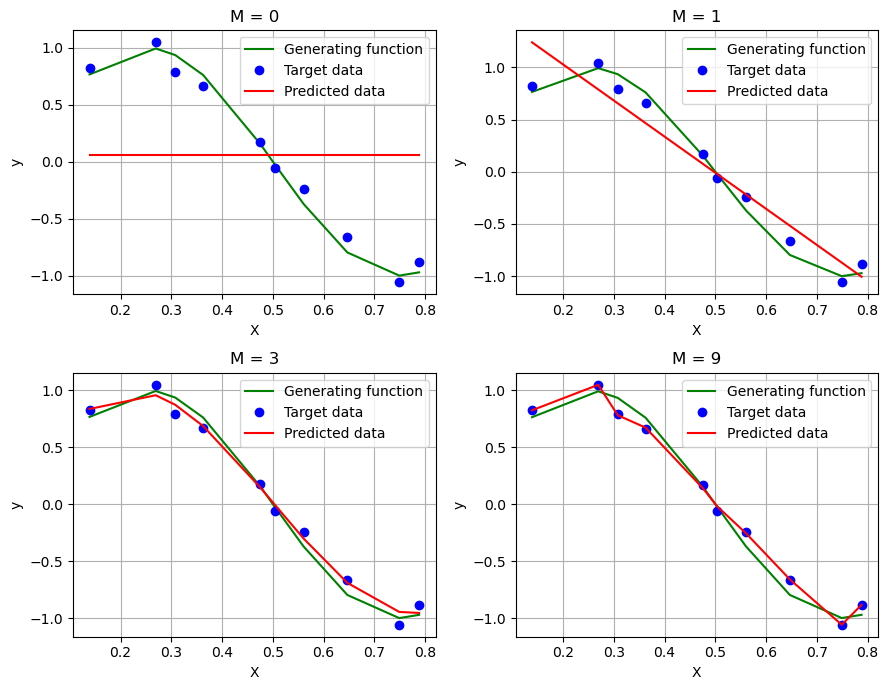

In [7]:
nrows, ncols = 2, 2

fig_luz, axes = plt.subplots(nrows, ncols, figsize=(9, 7), dpi = 100)

i = 0
for r in range(nrows):
    for c in range(ncols):
        
        axes[r,c].plot(X, func, 'g')
        axes[r,c].plot(X, y, 'bo')
        axes[r,c].plot(X, y_pred_list[i], 'r')
        axes[r,c].set_xlabel('X')
        axes[r,c].set_ylabel('y')
        axes[r,c].grid()
        axes[r,c].legend(['Generating function', 'Target data', 'Predicted data'])
        axes[r,c].set_title(f'M = {M_list[i]}')
        
        i+=1

plt.tight_layout()
plt.show()

### Error analysis

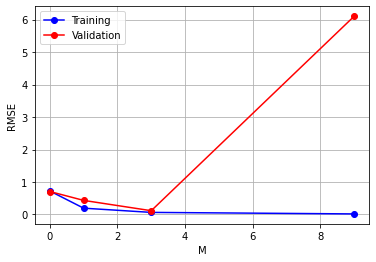

In [8]:
plt.plot(M_list, rmse_array, '-ob')
plt.plot(M_list, rmse_val_array, '-or')
plt.xlabel('M')
plt.ylabel('RMSE')
plt.grid()
plt.legend(['Training', 'Validation'])
plt.show()